## EXPLORATORY DATA ANALYSIS, BANK CHURN PREDICTION

#### Author: Sam Ayo 
connect: https://www.linkedin.com/in/sam-ayo

import neccessary libraries

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Load the dataset

In [14]:
dataset = pd.read_csv('Churn_Modelling.csv')

## Data Wrangling

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [17]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

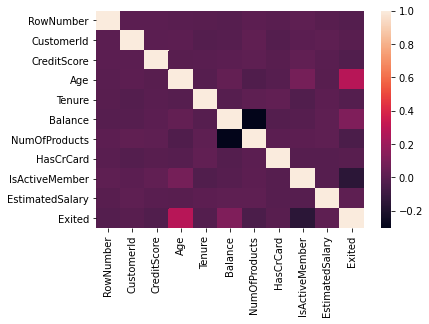

In [19]:
sns.heatmap(dataset.corr())

In [28]:
#Check if there is class imbalance in Purchase
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [20]:
categorical_columns = []
numerical_columns = []
#function that returns categorical and numerical column
def cat_num(final_train_data):
    for col in final_train_data.columns :
        if final_train_data[col].dtype == "object":
            categorical_columns.append(col)
        elif (final_train_data[col].dtype == "int64") | (final_train_data[col].dtype == "float64"):
            numerical_columns.append(col)
    return numerical_columns, categorical_columns
        
cat_num(dataset)
categorical_columns

['Surname', 'Geography', 'Gender']

In [21]:
dataset.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

#### map categorical columns to numerical values

In [22]:
code_numeric = {'Male': 1, 'Female': 2,
'France': 1, 'Spain': 2,'Germany': 3}

In [23]:
dataset = dataset.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


#### drop the columns with features that are not needed 

In [25]:
y = dataset['Exited']
X = dataset.drop(['Exited', 'Surname', 'RowNumber','CustomerId'], axis = 1)

In [26]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,2,42,2,0.00,1,1,1,101348.88
1,608,2,2,41,1,83807.86,1,0,1,112542.58
2,502,1,2,42,8,159660.80,3,1,0,113931.57
3,699,1,2,39,1,0.00,2,0,0,93826.63
4,850,2,2,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64
9996,516,1,1,35,10,57369.61,1,1,1,101699.77
9997,709,1,2,36,7,0.00,1,0,1,42085.58
9998,772,3,1,42,3,75075.31,2,1,0,92888.52


In [30]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

#### Feature Scaling(Standard Scaler): This is to convert those numbers to fall between 0 and 1

In [86]:
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [88]:
classifiers = {
    'K Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Logistics Regression': LogisticRegression(),
    #'SVM': SVC(random_state=1),
    #'Naive Bayes': GaussianNB(),
    #'Keras_m': model,
}

In [89]:
accuracies = []
means = []
print("Training...\n")
print("Results: \n")
for key, clf in classifiers.items() :
    #train data
    clf.fit(X_train, y_train)
    
    prediction = clf.predict(X_test)
    
    accuracy = accuracy_score(prediction, y_test)
    accuracies.append(accuracy)
    print("The accuracy of ", key, "is ",accuracy)
    
    f1= f1_score(prediction, y_test)
    means.append(f1)
    print("The f1 score of ", key, "is ",f1, '\n')
    
prediction

Training...

Results: 

The accuracy of  K Nearest Neighbors is  0.824
The f1 score of  K Nearest Neighbors is  0.4210526315789474 

The accuracy of  Decision Tree Classifier is  0.78
The f1 score of  Decision Tree Classifier is  0.47115384615384615 

The accuracy of  Logistics Regression is  0.814
The f1 score of  Logistics Regression is  0.3059701492537314 



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
knn = KNeighborsClassifier()

In [91]:
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier()

In [92]:
pred=knn.predict(X_test)
pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [95]:
threshold = 0.5
pred = pred > threshold

In [96]:
cm_bal= confusion_matrix(y_test, pred)

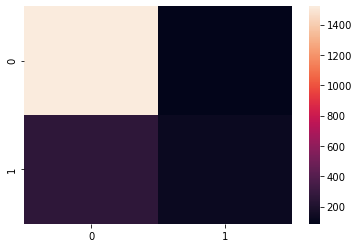

In [97]:
sns.heatmap(cm_bal)
plt.show()